In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle

In [2]:
placement = pd.read_csv(r'A:\Book1.csv')


In [3]:
placement.head()

,NAME,TENTH,TWELTH,CGPA,PLACED,PCOUNT,AMCAT
0,RAVI THEJA,95,55.0,7.60,NO,0,67
1,NITISH THELANAKULA,98,93.2,8.50,YES,1,76
2,NIRUPAM,87,81.0,9.01,YES,2,85
3,THAMITHURAI,55,78.0,6.70,NO,0,72
4,SAIVIGNESH,99,94.0,8.30,YES,2,69


In [4]:
placement_copy = placement.copy()

In [5]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['PLACED']

label_encoder = LabelEncoder()

for col in object_cols:
    placement_copy[col] = label_encoder.fit_transform(placement_copy[col])
    
placement_copy.head(10)

,NAME,TENTH,TWELTH,CGPA,PLACED,PCOUNT,AMCAT
0,RAVI THEJA,95,55.0,7.60,0,0,67
1,NITISH THELANAKULA,98,93.2,8.50,1,1,76
2,NIRUPAM,87,81.0,9.01,1,2,85
3,THAMITHURAI,55,78.0,6.70,0,0,72
4,SAIVIGNESH,99,94.0,8.30,1,2,69
5,SIDDARTH,60,57.0,7.80,0,0,55
6,KALAI,77,75.0,7.50,1,1,69
7,SELVAPRIYA,86,56.0,8.60,0,0,71
8,SARASWATHI,90,83.0,8.30,1,2,75
9,SONALIKA,78,67.0,5.80,0,0,54


In [6]:
placement_copy.to_csv('new_placement2.csv')

In [7]:
placement_copy.drop(['NAME'], axis = 1, inplace = True)

In [8]:
placement_copy.head(10)

,TENTH,TWELTH,CGPA,PLACED,PCOUNT,AMCAT
0,95,55.0,7.60,0,0,67
1,98,93.2,8.50,1,1,76
2,87,81.0,9.01,1,2,85
3,55,78.0,6.70,0,0,72
4,99,94.0,8.30,1,2,69
5,60,57.0,7.80,0,0,55
6,77,75.0,7.50,1,1,69
7,86,56.0,8.60,0,0,71
8,90,83.0,8.30,1,2,75
9,78,67.0,5.80,0,0,54


In [9]:
placement_copy.dtypes

TENTH       int64
TWELTH    float64
CGPA      float64
PLACED      int32
PCOUNT      int64
AMCAT       int64
dtype: object

In [10]:
placement_copy.isnull().sum()

TENTH     0
TWELTH    0
CGPA      0
PLACED    0
PCOUNT    0
AMCAT     0
dtype: int64

In [11]:
placement_copy.shape

(1094, 6)

Text(0.5, 1.0, 'Skill level')

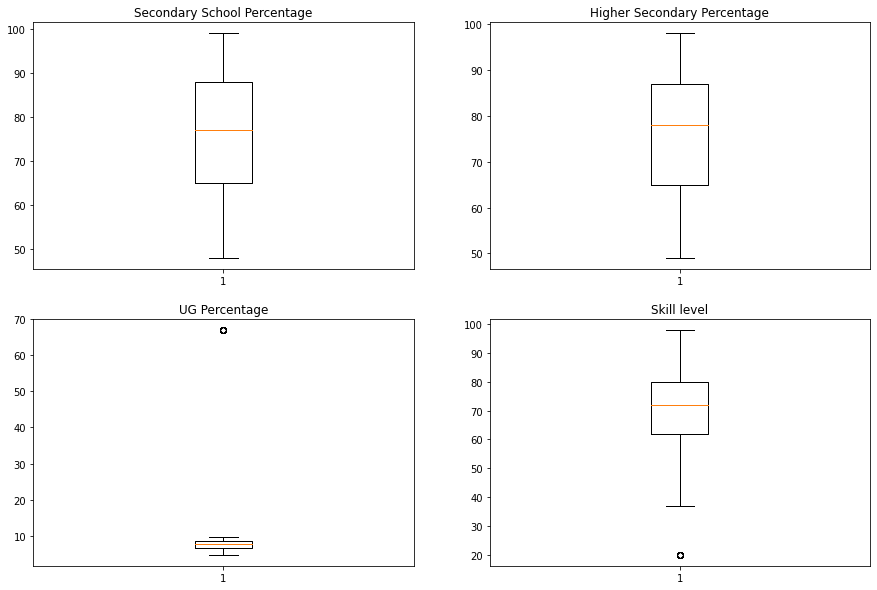

In [12]:
plt.figure(figsize = (15, 10))

ax = plt.subplot(221)
plt.boxplot(placement_copy['TENTH'])
ax.set_title('Secondary School Percentage')

ax = plt.subplot(222)
plt.boxplot(placement_copy['TWELTH'])
ax.set_title('Higher Secondary Percentage')

ax = plt.subplot(223)
plt.boxplot(placement_copy['CGPA'])
ax.set_title('UG Percentage')

ax = plt.subplot(224)
plt.boxplot(placement_copy['AMCAT'])
ax.set_title('Skill level')

In [13]:
Q1 = placement_copy['CGPA'].quantile(0.25)
Q3 = placement_copy['CGPA'].quantile(0.75)
IQR = Q3 - Q1

filter = (placement_copy['CGPA'] >=Q1 - 1.5 * IQR) & (placement_copy['CGPA']<= Q3 + 1.5*IQR)
placement_filtered = placement_copy.loc[filter]

In [14]:
Q1 = placement_copy['AMCAT'].quantile(0.25)
Q3 = placement_copy['AMCAT'].quantile(0.75)
IQR = Q3 - Q1

filter = (placement_copy['AMCAT'] >=Q1 - 1.5 * IQR) & (placement_copy['AMCAT']<= Q3 + 1.5*IQR)
placement_filtered = placement_copy.loc[filter]

{'whiskers': [<matplotlib.lines.Line2D at 0x25b3f9ed630>,
 'caps': [<matplotlib.lines.Line2D at 0x25b3f9edbd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b3f9ed360>],
 'medians': [<matplotlib.lines.Line2D at 0x25b3f9ee170>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b3f9ee440>],
 'means': []}

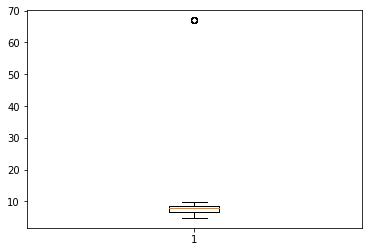

In [15]:
plt.boxplot(placement_filtered['CGPA'])


{'whiskers': [<matplotlib.lines.Line2D at 0x25b3fa6c670>,
 'caps': [<matplotlib.lines.Line2D at 0x25b3fa6cc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b3fa6c3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x25b3fa6d1b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b3fa6d480>],
 'means': []}

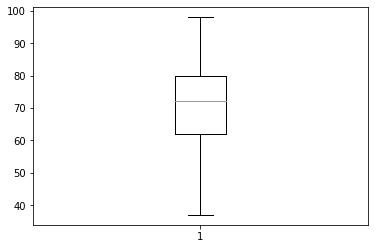

In [16]:
plt.boxplot(placement_filtered['AMCAT'])


In [17]:
Q1_ = placement_copy['CGPA'].quantile(0.25)
Q3_ = placement_copy['CGPA'].quantile(0.75)
IQR = Q3_ - Q1_

filter = (placement_copy['CGPA'] >=Q1_ - 1.5 * IQR) & (placement_copy['CGPA']<= Q3_ + 1.5*IQR)
placement_filtered = placement_copy.loc[filter]

{'whiskers': [<matplotlib.lines.Line2D at 0x25b3f282cb0>,
 'caps': [<matplotlib.lines.Line2D at 0x25b3f283250>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b3f2829e0>],
 'medians': [<matplotlib.lines.Line2D at 0x25b3f2837f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b3f283ac0>],
 'means': []}

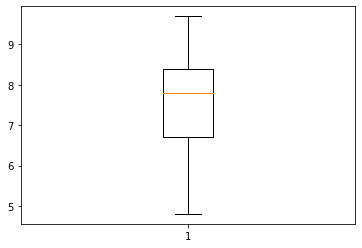

In [18]:
plt.boxplot(placement_filtered['CGPA'])


In [19]:
X = placement_copy.drop(['PLACED'], axis =1)
y = placement_copy.PLACED

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 4)

In [21]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy = " ,logreg.score(X_test, y_test))

Accuracy =  0.8036529680365296


In [22]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))

Accuracy =  0.8995433789954338


In [23]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier(n_estimators = 100)

rt.fit(X_train, y_train)
y_pred = rt.predict(X_test)

print("Accuracy= ", metrics.accuracy_score(y_test, y_pred))


Accuracy=  1.0


In [24]:
#input trial
input= np.array([86,56.0,8.60,0,71])

In [25]:
inp=input.reshape(1, -1)

In [26]:
x=rt.predict(inp)
if x==[0]:
    print("Predicted Placement: Not Placed ")
else:
    print("Predicted Placement: Placed")

Predicted Placement: Not Placed 


A:\CS\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
input= np.array([78,74,9,2,80])

In [28]:
inp=input.reshape(1, -1)

In [29]:
x=rt.predict(inp)
if x==[0]:
    print("Predicted Placement: Not Placed ")
else:
    print("Predicted Placement: Placed")

Predicted Placement: Placed


A:\CS\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
pickle.dump

<function _pickle.dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)>